In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

iris = pd.read_csv('C:/Users/leo/Desktop/kaggle/classification/iris/IRIS.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.head()
x = iris.iloc[:,[0,1,2,3]].values ##選定特定列並轉為numpy數值

In [4]:
iris_outcome = pd.crosstab(index = iris['species'],columns = 'count')
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
iris_1 = iris.loc[iris['species'] == 'Iris-setosa']
iris_2 = iris.loc[iris['species'] == 'Iris-versicolor']
iris_3 = iris[iris['species'] == 'Iris-virginica']

In [26]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        max_iter = 300, ###最大迭代次數
        n_init = 10,  ###每個簇數量運行算法的次數，選擇最好的結果
        random_state = 0 ###設定隨機種子，以確保可重複性
    )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 
    ###inertia_ 是k-means模型的一個屬性，表示每個點到其分配的簇中心的距離的平方和
    


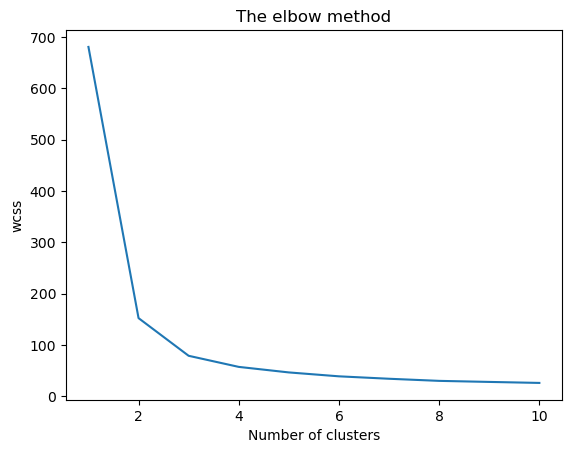

In [25]:
#The elbow method

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
##通過上圖，選擇n_clusters = 3

kmeans = KMeans(
        n_clusters = 3,
        init = 'k-means++',
        max_iter = 300, 
        n_init = 10,  
        random_state = 0 
    )
y_kmeans = kmeans.fit_predict(x)

C:\Users\leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


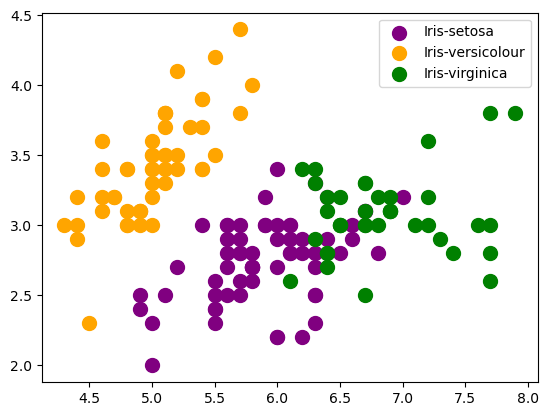

In [30]:
plt.scatter(
    x[y_kmeans == 0, 0], #選擇簇=0的第1個特徵
    x[y_kmeans == 0, 1], #選擇簇=0的第2個特徵
    s = 100, 
    c = 'purple', 
    label = 'Iris-setosa'
)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()